# Heart Disease Classification 

In this project I will apply different ML models to the UCI Heart Disease Dataset from Kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data. 

### The problem statement:
> to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose.

### The goal of this project:
 * practice building logistic regression, support vector classifier and decision tree using Scikit-learn;
 * compare these models on this particular task;
 * try implementing GridSearchCV on SVC;
 * try implementing cost complexity pruning on decision tree and visualize different alphas. 

# Steps:

   * **Data Preprocessing**
   * **Logistic Regression**
   * **Support Vector Classifier**
   * **Decision Tree Classifier**
   * **Cost Complexity Pruning**

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Import the data

In [3]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(file_path, header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.shape

(303, 14)

## Dealing with missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    float64
 2   cp         303 non-null    float64
 3   trestbps   303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    float64
 6   restecg    303 non-null    float64
 7   thalach    303 non-null    float64
 8   exang      303 non-null    float64
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    float64
 11  ca         303 non-null    object 
 12  thal       303 non-null    object 
 13  condition  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.isnull().any().max()

False

In [8]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [9]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [10]:
missing = pd.concat([df.loc[df['ca'] == '?'], 
                    df.loc[df['thal'] == '?']], axis=0)

list(missing.index)

[166, 192, 287, 302, 87, 266]

In [11]:
for index in list(missing.index):
    df.drop(index=[index], inplace=True, axis=0)

## Defining target and features

In [12]:
df.shape

(297, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    float64
 4   chol       297 non-null    float64
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    float64
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    object 
 12  thal       297 non-null    object 
 13  condition  297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [14]:
X = df.drop('condition', axis=1).copy()

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [15]:
y = df['condition'].copy()

## OneHotEncoding

In [16]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0


## Target variable

In [17]:
y.unique()

array([0, 2, 1, 3, 4])

In [18]:
y_not_zero = y > 0
y[y_not_zero] = 1

y.unique()

array([0, 1])

## Splitting the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (222, 25)
X_test shape: (75, 25)
y_train shape: (222,)
y_test shape: (75,)


# Logistic Regression

In [20]:
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
print(f' Accuracy score of the logistic regression: {accuracy_score(y_test, log_pred)}')

 Accuracy score of the logistic regression: 0.8533333333333334


# SVC 

In [21]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.533 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.533 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.523 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.523 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.545 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.533 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.533 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.523 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.523 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.545 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.533 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 4/5] END .................C=1000, gamma=0.1;, score=0.545 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.545 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.578 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.533 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.591 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.636 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.568 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.667 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.689 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.545 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.636 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.614 total time=   0.0s
[CV 1/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [22]:
best_model = grid.best_estimator_

best_model

SVC(C=100, gamma=0.0001)

In [23]:
svc_pred = best_model.predict(X_test)
print(f'Accuracy score of the SVC model: {accuracy_score(y_test, svc_pred)}')

Accuracy score of the SVC model: 0.7866666666666666


# Preliminary Classification Tree

[Text(519.8210526315789, 468.855, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = Yes HD'),
 Text(268.72105263157897, 428.08500000000004, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = No Nd'),
 Text(167.4, 387.315, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = Yes HD'),
 Text(88.10526315789474, 346.54499999999996, 'cp_2.0 <= 0.5\ngini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = Yes HD'),
 Text(35.242105263157896, 305.775, 'oldpeak <= 0.35\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = Yes HD'),
 Text(17.621052631578948, 265.005, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Yes HD'),
 Text(52.863157894736844, 265.005, 'slope_3.0 <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes HD'),
 Text(35.242105263157896, 224.235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No Nd'),
 Text(70.48421052631579, 224.235, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes HD'),
 Text(140.96842105

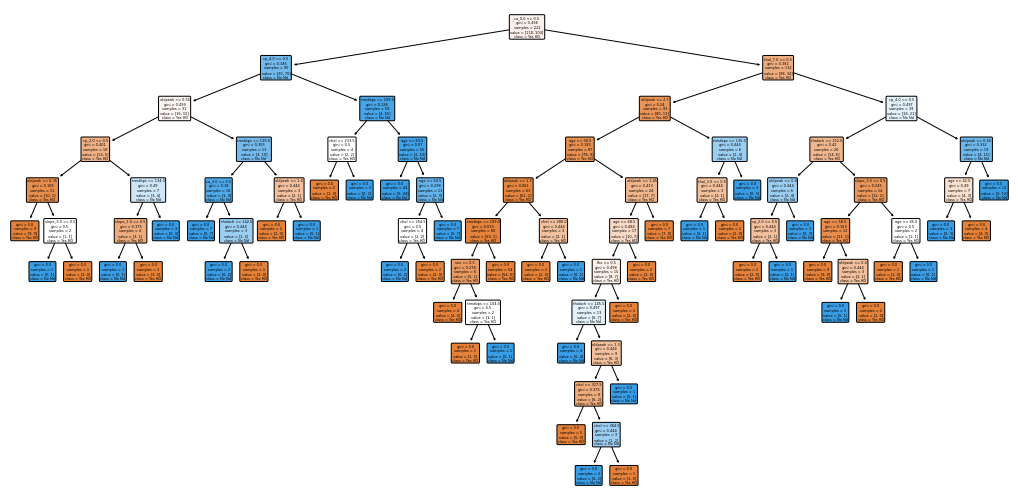

In [24]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

plt.figure(figsize=(18, 9))
plot_tree(clf_dt,
         filled=True, 
         rounded=True, 
         class_names = ['Yes HD', 'No Nd'],
         feature_names = X_encoded.columns)

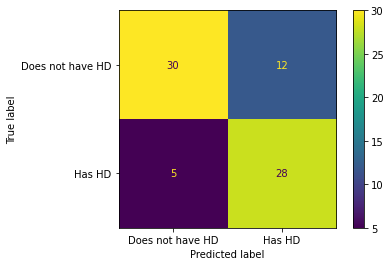

In [25]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

## Cost Complexity Pruning: Visualizing alpha

In [26]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

print((type(ccp_alphas)))
ccp_alphas

<class 'numpy.ndarray'>


array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [27]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
    
print(clf_dts)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.0029529529529529544, random_state=0), DecisionTreeClassifier(ccp_alpha=0.003861003861003862, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004054054054054055, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004095004095004095, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004293579293579285, random_state=0), DecisionTreeClassifier(ccp_alpha=0.005787605787605791, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0063593004769475344, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006675906675906675, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state=0), DecisionTreeClassifie

In [28]:
# Let's graph the accuracy of the trees

train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

print(train_scores)
print(test_scores)

[1.0, 0.9954954954954955, 0.9819819819819819, 0.9774774774774775, 0.972972972972973, 0.9594594594594594, 0.9324324324324325, 0.9099099099099099, 0.9099099099099099, 0.9099099099099099, 0.9099099099099099, 0.9099099099099099, 0.9054054054054054, 0.9009009009009009, 0.9009009009009009, 0.8918918918918919, 0.8828828828828829, 0.8783783783783784, 0.8693693693693694, 0.8693693693693694, 0.8513513513513513, 0.8423423423423423, 0.8108108108108109, 0.7747747747747747, 0.7702702702702703, 0.7567567567567568]
[0.7466666666666667, 0.7466666666666667, 0.7466666666666667, 0.7466666666666667, 0.7466666666666667, 0.76, 0.76, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.8, 0.8, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8266666666666667, 0.8266666666666667, 0.8533333333333334, 0.8533333333333334, 0.7866666666666666, 0.7066666666666667]


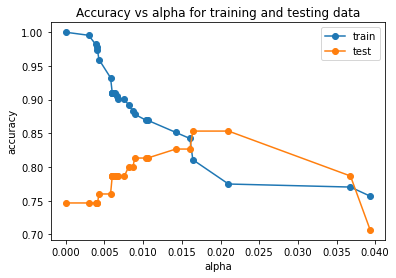

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing data')
ax.plot(ccp_alphas, train_scores, label='train', marker='o')
ax.plot(ccp_alphas, test_scores, label='test', marker='o')
ax.legend()

## Cost Complexity Pruning: Cross-validation

In [30]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)

print(scores)

[0.53333333 0.86666667 0.75       0.75       0.77272727]


In [31]:
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df

,tree,accuracy
0,0,0.533333
1,1,0.866667
2,2,0.750000
3,3,0.750000
4,4,0.772727


<AxesSubplot:xlabel='tree'>

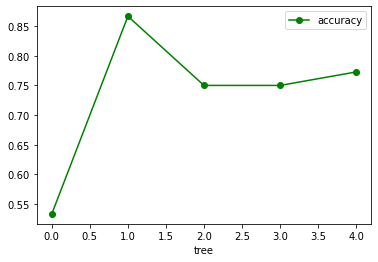

In [32]:
df.plot(x='tree', y='accuracy', marker='o', c='g')

Let's use cross validation to find the optimal value for alpha

In [33]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas: 
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['Alpha', 'Mean accuracy', 'Standard Deviation'])

alpha_results

,Alpha,Mean accuracy,Standard Deviation
0,0.000000,0.688990,0.074431
1,0.002953,0.688990,0.074431
2,0.003861,0.697879,0.077793
3,0.004054,0.697879,0.077793
4,0.004095,0.697879,0.077793
5,0.004294,0.697879,0.077793
6,0.005788,0.720606,0.090080
7,0.006006,0.720606,0.090080
8,0.006006,0.720606,0.090080
9,0.006006,0.720606,0.090080


<AxesSubplot:xlabel='Alpha'>

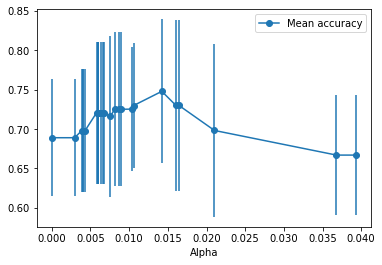

In [34]:
alpha_results.plot(x='Alpha', y='Mean accuracy', yerr='Standard Deviation', marker='o')

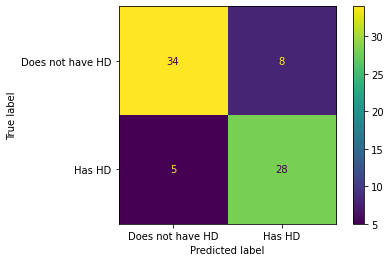

In [36]:
ideal_ccp_alpha = 0.014225

clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

[Text(460.35, 428.08500000000004, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = Does not have HD'),
 Text(251.10000000000002, 305.775, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Has HD'),
 Text(167.4, 183.46500000000003, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = Does not have HD'),
 Text(83.7, 61.15499999999997, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = Does not have HD'),
 Text(251.10000000000002, 61.15499999999997, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Has HD'),
 Text(334.8, 183.46500000000003, 'gini = 0.126\nsamples = 59\nvalue = [4, 55]\nclass = Has HD'),
 Text(669.6, 305.775, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = Does not have HD'),
 Text(502.20000000000005, 183.46500000000003, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = Does not have HD'),
 Text(418.5, 61.15499999999997, 'gini = 0.185\nsamples = 87\nvalue = [7

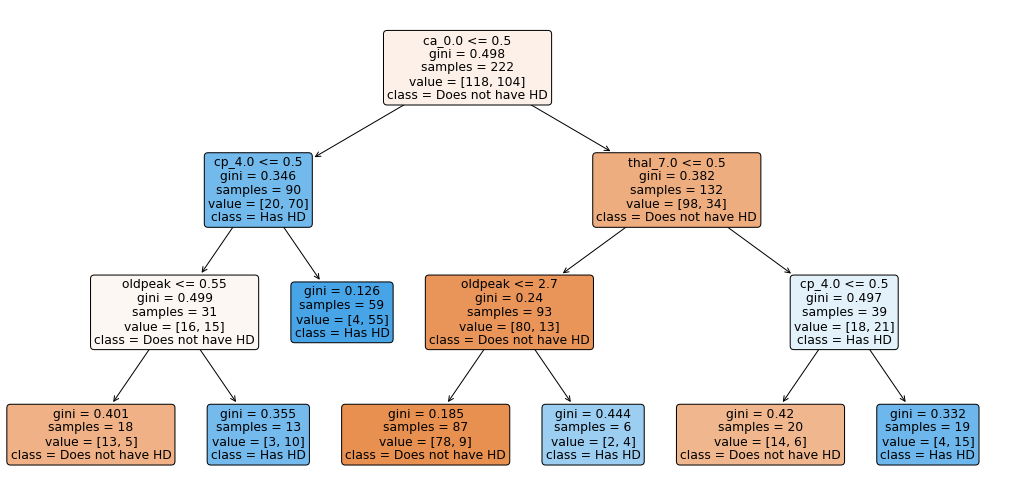

In [38]:
plt.figure(figsize=(18, 9))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names = ['Does not have HD', 'Has HD'], 
         feature_names = X_encoded.columns)